In [ ]:
from cotj_pipeline_qwenimage import CoTjQwenImagePipeline
import os
model_path = '~/.cache/modelscope/hub/models/Qwen/Qwen-Image/'
mlp_path = './prompt_models/qwenimage_mlp_models/'
device='cuda:1'
pipe = None
cotj = CoTjQwenImagePipeline(model_path=model_path,mlp_path=mlp_path, pipe=pipe, device=device)


In [2]:
prompt = "一位身着深蓝色Polo衫的年轻女性研究员，胸前印有“Unicom”的红色Logo，正对镜头自信微笑，在充满科技感的数据中心透明的玻璃幕墙上，用黑色马克笔清晰地写着：“CoTj 让生成式 AI 从‘盲人摸象’的固定模式，迈入‘智能规划’的自适应时代。”"


num_inference_steps = 10

#baseline euler.
pipe_image  = cotj.get_pipe_image(prompt, 
                                  num_inference_steps=num_inference_steps, 
                                  width=1664, 
                                  height=928,
                                  seed=42)

#Fixed-Step Planning
prompt_cotj_image_fixed = cotj.get_prompt_cotj_image_fixed_step(prompt, 
                                                    num_inference_steps=num_inference_steps, 
                                                    width=1664, 
                                                    height=928,
                                                    seed=42)
#Adaptive-Length Planning
prompt_cotj_image_adaptive = cotj.get_prompt_cotj_image_adaptive_step(prompt, 
                                    inference_steps_max = 50, 
                                    fidelity_target=0.99, 
                                    width=1664, 
                                    height=928,
                                    seed=42)

100%|██████████| 10/10 [00:06<00:00,  1.63it/s]


exponential


100%|██████████| 10/10 [00:06<00:00,  1.64it/s]


exponential


100%|██████████| 9/9 [00:05<00:00,  1.64it/s]


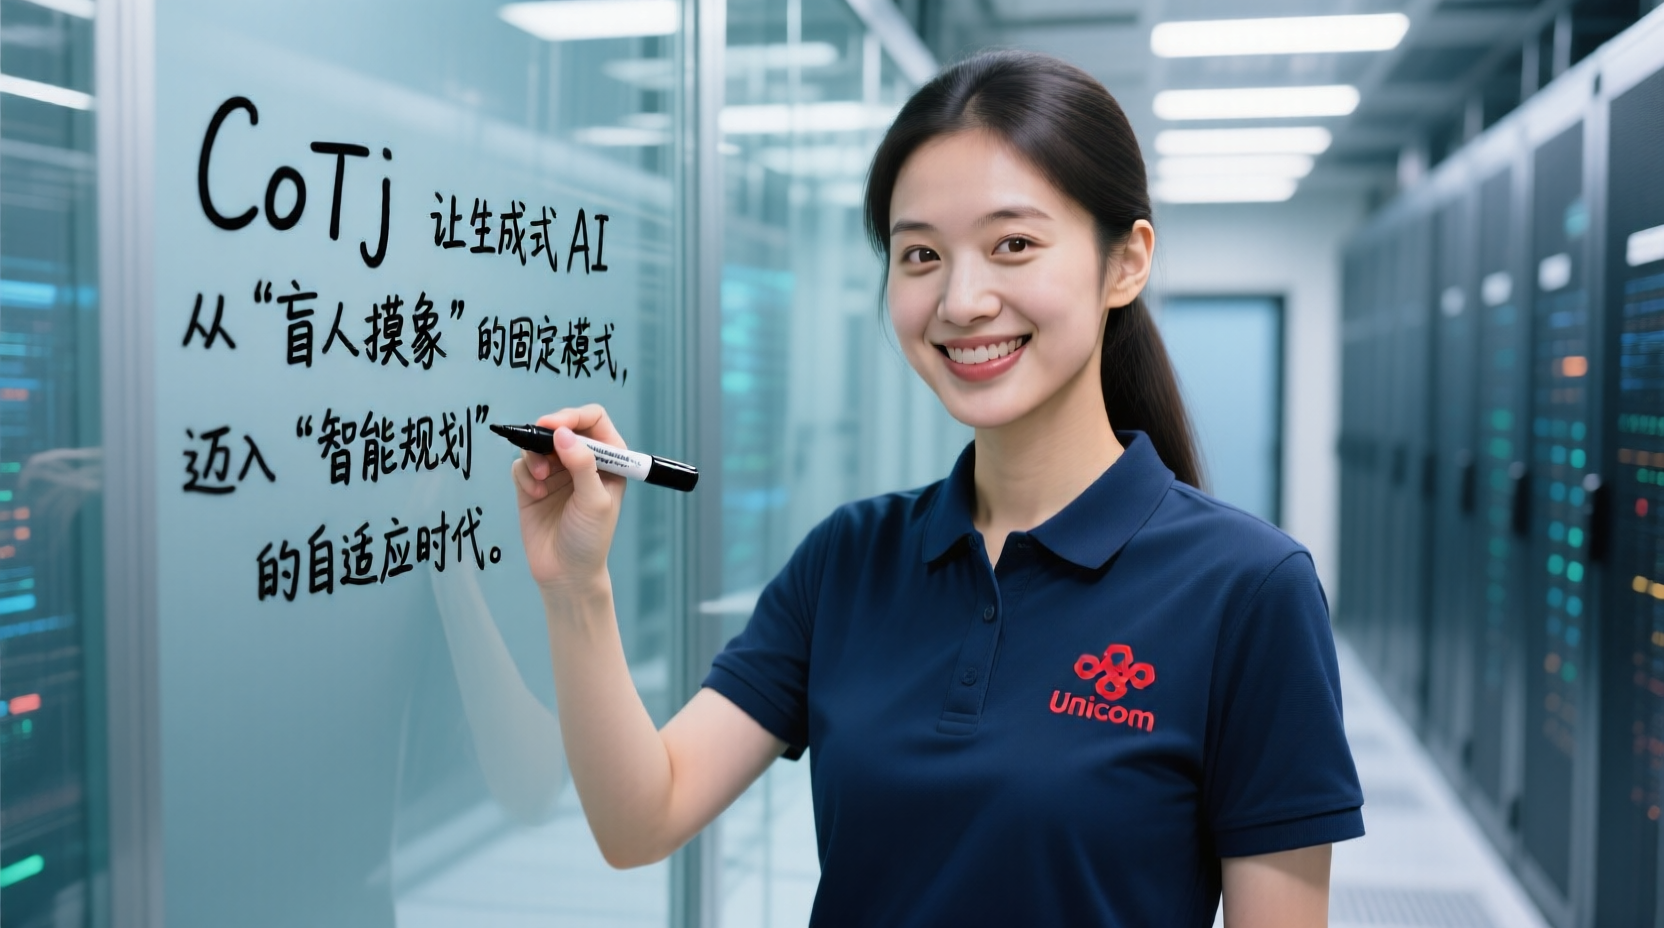

In [3]:
prompt_cotj_image_adaptive.images[0]

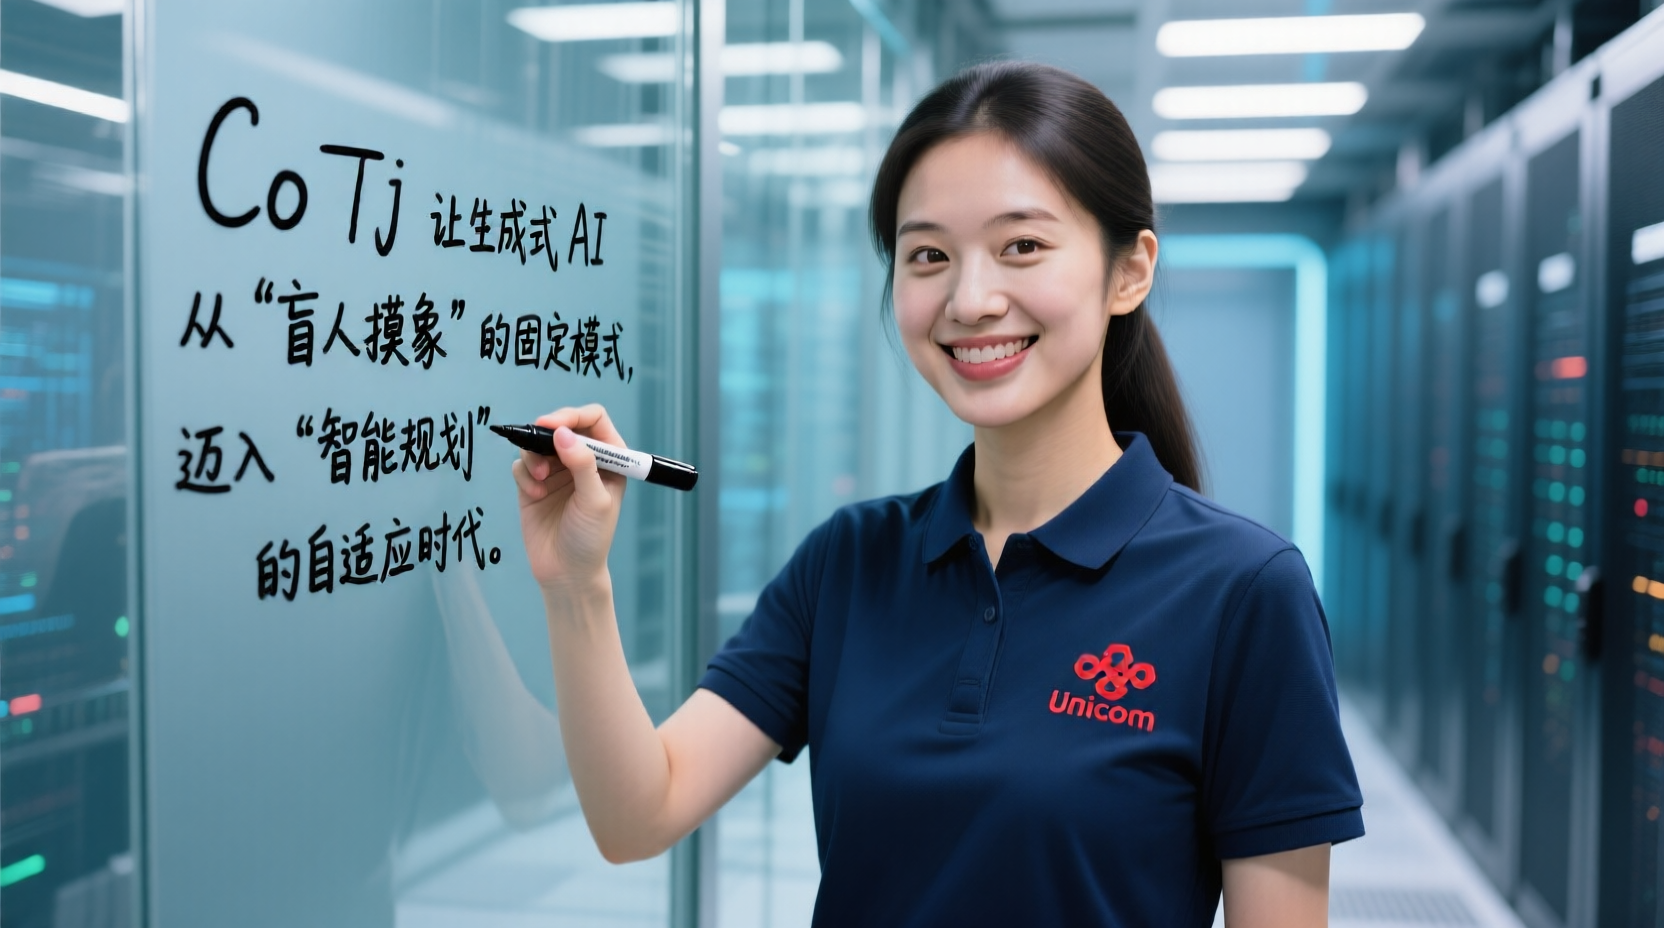

In [4]:
prompt_cotj_image_fixed.images[0]

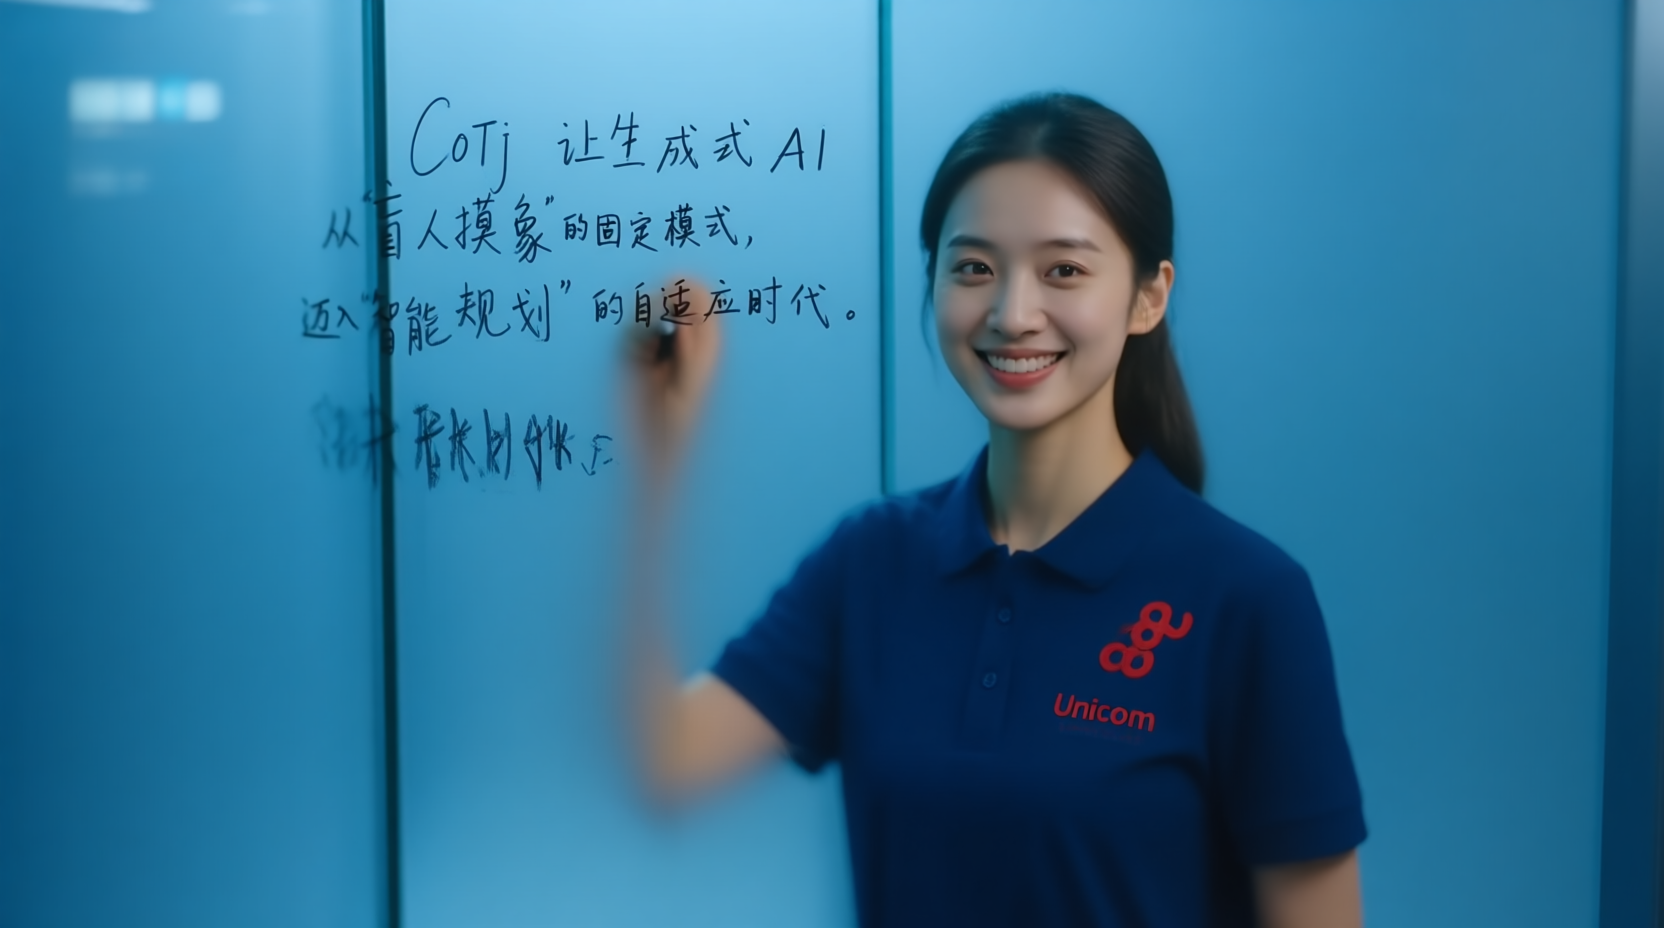

In [5]:
pipe_image.images[0]

In [7]:
prompt_cotj_image_adaptive = cotj.get_prompt_cotj_image_adaptive_step(prompt, 
                                    inference_steps_max = 50, 
                                    fidelity_target=0.995, 
                                    width=1664, 
                                    height=928,
                                    seed=42)

exponential


100%|██████████| 14/14 [00:08<00:00,  1.64it/s]


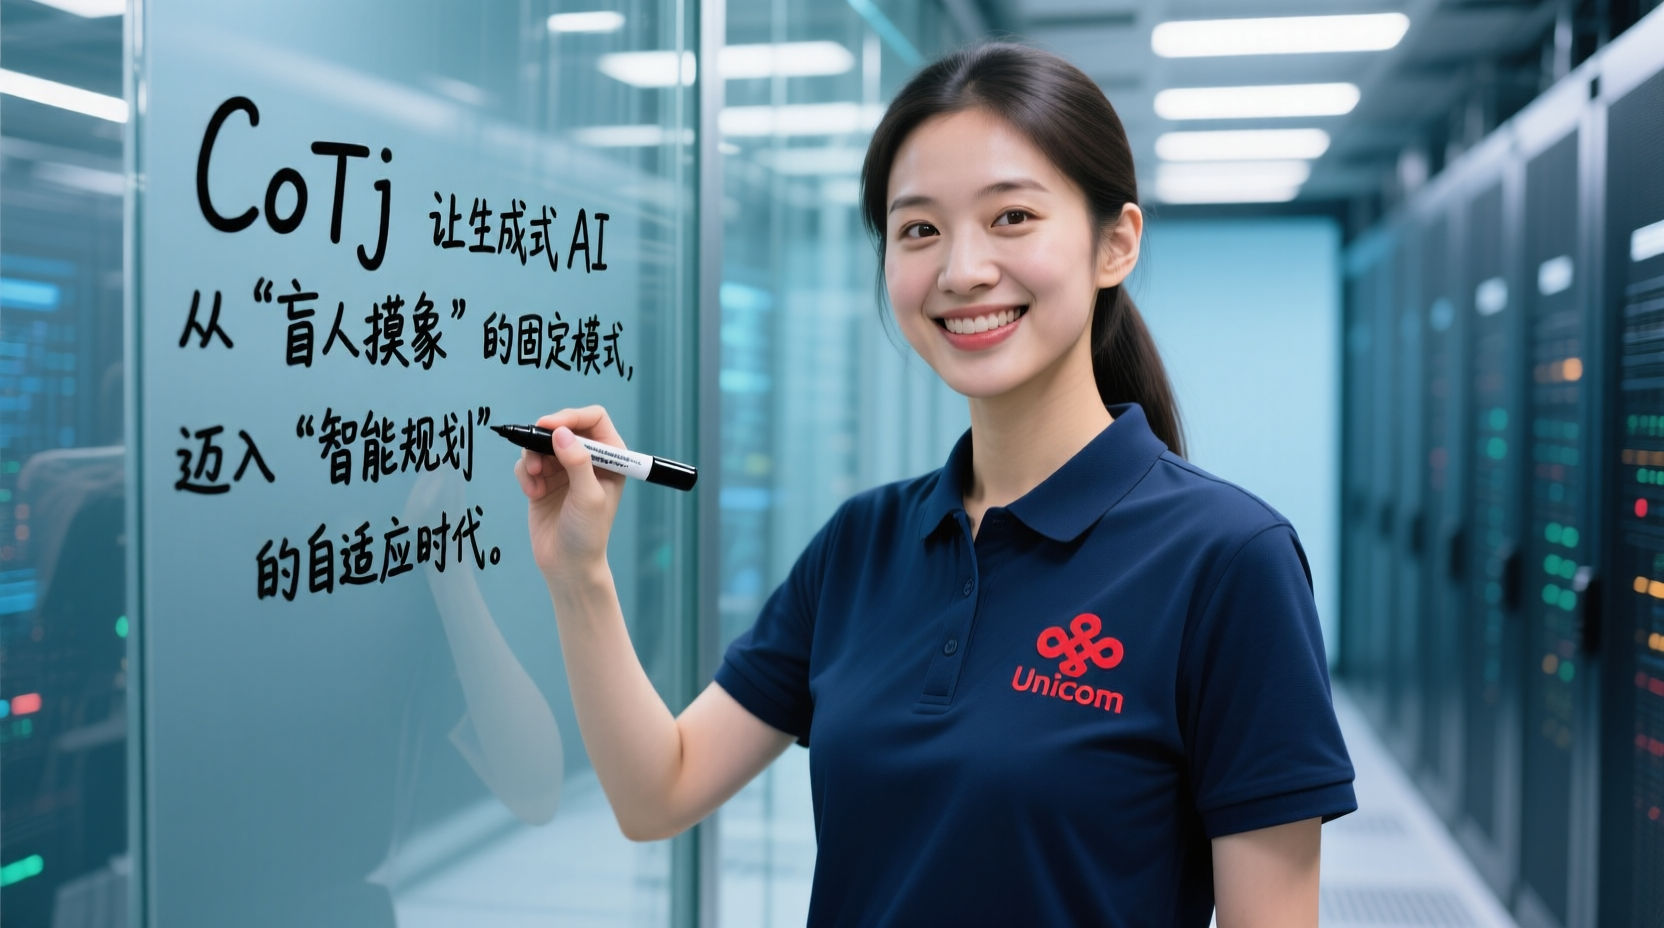

In [8]:
prompt_cotj_image_adaptive.images[0]